In [2]:
# https://www.kaggle.com/c/dogs-vs-cats
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

# Easy way to generate metadata? That is the next part. 
    #


import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

train = 'train/*.jpg'
test = 'test1/*.jpg'

np.random.seed(0)

C:\Users\tyu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
#image = cv2.imread('train/cat.0.jpg')

def image_to_feature_vector(image, size=(150, 150)):
    return cv2.resize(image, size)#.flatten()

all_labels_list = []
all_data_list = []

for filename in glob.glob('train/*.jpg'):
    
    label = 0 if filename[filename.find('\\')+1:].split('.')[0] == 'cat' else 1
    all_labels_list.append(label)
    
    image = cv2.imread(filename)
    all_data_list.append(image_to_feature_vector(image))

all_labels = np.array(all_labels_list)
all_data = np.array(all_data_list)

train_data, dev_data, train_labels, dev_labels = train_test_split(all_data, all_labels, test_size=0.2)


(150, 150, 3)


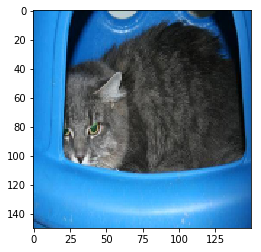

In [11]:
print (train_data[95].shape)

plt.imshow(cv2.cvtColor(train_data[95], cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
# is 150x150 too big? Is there an optimal size?
# How to pick the numbers after Conv2D. Ie. the number of filters and kernel size?
# Relu is hot because it gives non-negative values. Are there any other popular ones you'd recommend?

#(3,3) = kernels
# 32,64 = # of filters

#((3 kernel height*3 kernel width)*3 channels + 1 bias)*32 filters
#So things don't have to pass through the origin. 

# For the below, it has to be overall same area. 

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#((3 kernel height*3 kernel width)*32 inputted layers + 1 bias)*32 filters
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# How do I know 3 layers is enough?

In [7]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

# Dense is the fully connected layer. 
model.add(Dense(64))
# you might be able to feed in new data between here. Concat it to the dense layer. 
model.add(Activation('relu'))
model.add(Dropout(0.5))
# you might be able to feed in new data between here. Concat it to the dense layer. 
# https://stackoverflow.com/questions/46791471/keras-concatenating-metadata-into-a-cnn
# Look up vggface 

# This is the final deciding step it seems like
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

print(model.summary()) # number of parameters per layer. 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [17]:
img_width, img_height = 150,150
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 50

# batch size inverse of pixel size
# Powers of two for batch size increase. 
# Theoretically you could calculate. 
# What is the overhead? 


# It should match with the tutorial. Must be a difference somewhere. 
# The more epochs you run, the more you're fitting to the training data. Makes it very complex. 
# Complexity/Learning curves


train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1. / 255
)

train_generator = train_datagen.flow_from_directory(
    'data/train_data/',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    'data/dev_data/',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 2002 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/50
125/125 [==============================] - 371s 3s/step - loss: 0.7196 - acc: 0.5000 - val_loss: 0.6888 - val_acc: 0.5300
Epoch 2/50
125/125 [==============================] - 127s 1s/step - loss: 0.7042 - acc: 0.5430 - val_loss: 0.6857 - val_acc: 0.5300
Epoch 3/50
125/125 [==============================] - 119s 955ms/step - loss: 0.6909 - acc: 0.5870 - val_loss: 0.6873 - val_acc: 0.5463
Epoch 4/50
125/125 [==============================] - 145s 1s/step - loss: 0.6883 - acc: 0.5955 - val_loss: 0.6343 - val_acc: 0.6450
Epoch 5/50
125/125 [==============================] - 133s 1s/step - loss: 0.6861 - acc: 0.6055 - val_loss: 0.6635 - val_acc: 0.6125
Epoch 6/50
125/125 [==============================] - 151s 1s/step - loss: 0.6910 - acc: 0.6250 - val_loss: 0.6593 - val_acc: 0.6225
Epoch 7/50
125/125 [==============================] - 145s 1s/step - loss: 0.6804 - acc: 0.6505 - val_loss: 0.6546 -

In [ ]:
model.fit(train_data, 
          train_labels, 
          validation_data=(dev_data, dev_labels), 
          epochs=10, 
          steps_per_epoch = nb_train_samples // batch_size,
          validation_steps=nb_validation_samples // batch_size)